# Extracción de datos del Flight Record

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import folium
import random
from folium.plugins import HeatMap

Se grafica el recorrido del drone para el registro de vuelo extraído.

,latitude,longitude
0,-34.437662,-59.052155
1,-34.437662,-59.052155
2,-34.437662,-59.052155
3,-34.437662,-59.052155
4,-34.437662,-59.052155
...,...,...
8220,-34.437631,-59.052115
8221,-34.437631,-59.052115
8222,-34.437631,-59.052115
8223,-34.437631,-59.052115


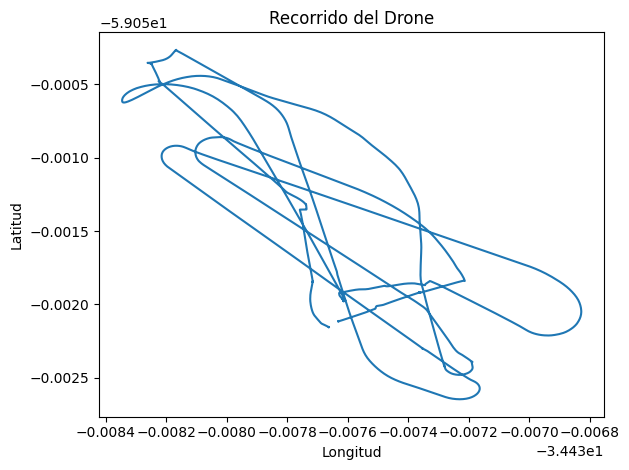

In [45]:
columns = ["latitude", "longitude"]
df = pd.read_csv("flightRecord.csv", usecols=columns)
lat = np.array(df.latitude)
lon = np.array(df.longitude)
plt.plot(df.latitude,df.longitude)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Recorrido del Drone')
df

Se puede obtener el mapa a través de la librería `folium`. Esta librería permite obtener diferentes tipos de mapas interactivos, incluso su uso se puede extender a páginas web y con ello crear el tipo de contenido que se tenía planteado.

A continuación se muestra cómo obtener un mapa a partir de coordenadas dadas.

In [ ]:
map=folium.Map(location=[lat[0],lon[0]])
map

Ahora, se llama al mismo mapa, modificando el zoom. Luego, a partir de los datos del dataframe, se grafica el recorrido hecho por el drone.

In [ ]:
map = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], control_scale=True, zoom_start=100)
flightRecord = []
for i in range(len(df.latitude)):
    flightRecord.append([df.latitude[i], df.longitude[i]])
folium.PolyLine(flightRecord, color='red').add_to(map)
map

El paquete folium permite también crear mapas de calor y mapas que tengan marcadores para los cuales es posible obtener un gráfico. Esas posibilidades son exactamente las necesarias para poder obtener el resultado final del trabajo práctico. 

Para probar el funcionamiento del mapa de calor se procede a generar de forma aleatoria datos de intensidad de campo electromagnético con valores entre 0 y 9. Estos valores son meramente ilustrativos.

In [ ]:
intValues = []
for i in range(len(df.latitude)):
    intValues.append(random.randint(0,9))
dataFrame = df.assign(intensidad=intValues)
heat_data = [[row['latitude'],row['longitude']] for index, row in dataFrame.iterrows()]
HeatMap(heat_data).add_to(map)
map

Finalmente, para concluir la prueba, se exporta el mapa en formato html para poder abrir el archivo generado en un navegador.

In [46]:
map.save("testMap.html")